In [19]:
# Cell 1 - Imports
import sys
import os
sys.path.append('..')

from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

# Load environment variables
load_dotenv()

# Import our custom functions
from scripts.document_processor import load_pdf, chunk_text, load_pdfs_from_directory
from scripts.embedding_manager import create_embeddings, setup_vector_store
from scripts.mcq_processor import MCQProcessor, MCQInput
from scripts.mcq_generator import generate_mcq_dataset

In [21]:
import json
import os
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cell 2 - Load PDF Document
# Load PDF
# pdf_path = '../data/LiverFailure-English-report.pdf'
# documents = load_pdf(pdf_path)
# print(f"Loaded {len(documents)} pages from PDF")

Loaded 35 pages from PDF


In [2]:
# Cell 2 - Load PDF Documents
# Load all PDFs from data directory
data_dir = '../data'
documents = load_pdfs_from_directory(data_dir)
print(f"Loaded total {len(documents)} pages from all PDFs")


Loaded 11 pages from sacks-et-al-2006-soy-protein-isoflavones-and-cardiovascular-health.pdf
Loaded 8 pages from 868-Article Text-1633-2-10-20170528.pdf
Loaded 14 pages from Convulsive Status Epliepsy.pdf
Loaded 23 pages from metlay-et-al-2019-diagnosis-and-treatment-of-adults-with-community-acquired-pneumonia-an-official-clinical-practice.pdf
Loaded 9 pages from silberstein-et-al-2012-evidence-based-guideline-update-pharmacologic-treatment-for-episodic-migraine-prevention-in.pdf
Loaded 80 pages from Primary Open-Angle Glaucoma PPP.pdf
Loaded 39 pages from Adult Sinusitis.pdf


Ignoring wrong pointing object 8 0 (offset 0)


Loaded 16 pages from Rheumatoid Arthritis.pdf
Loaded 17 pages from nonalcoholic-fatty-liver-disease-nafld-assessment-and-management-pdf-1837461227461.pdf
Loaded 4 pages from diabetes_guidelines.pdf


Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 16 0 (offset 0)
Ignoring wrong pointing object 18 0 (offset 0)
Ignoring wrong pointing object 20 0 (offset 0)
Ignoring wrong pointing object 22 0 (offset 0)
Ignoring wrong pointing object 24 0 (offset 0)
Ignoring wrong pointing object 34 0 (offset 0)
Ignoring wrong pointing object 36 0 (offset 0)
Ignoring wrong pointing object 38 0 (offset 0)
Ignoring wrong pointing object 40 0 (offset 0)
Ignoring wrong pointing object 48 0 (offset 0)
Ignoring wrong pointing object 51 0 (offset 0)
Ignoring wrong pointing object 66 0 (offset 0)


Loaded 8 pages from AIC_Tapering_and_Testing_Guide.pdf
Loaded 25 pages from Acne.pdf
Loaded 66 pages from World Federation of Societies of Biological Psychiatry  WFSBP  Guidelines for the Pharmacological Treatment of Anxiety  Obsessive-Compulsive and Post-.pdf
Loaded 2 pages from CommonCold_fact_sheet_508.pdf
Loaded 35 pages from LiverFailure-English-report.pdf
Loaded 199 pages from KDIGO-2024-CKD-Guideline.pdf
Loaded 28 pages from hematology.pdf
Loaded 37 pages from ESPEN_guideline_on_clinical_nutrition_in_liver_disease.pdf
Loaded 64 pages from gonorrhoeae.pdf
Loaded 11 pages from AcuteAltitudeSickness.pdf
Loaded total 696 pages from all PDFs


In [3]:
# Cell 3 - Create Text Chunks
# Create chunks
chunks = chunk_text(documents)
# print(f"Created {len(chunks)} chunks")
print(f"Processed {len(documents)} pages into {len(chunks)} chunks")

# Display one chunk as example
print("\nExample chunk:")
print(chunks[12].page_content[:200])

Processed 696 pages into 4458 chunks

Example chunk:
Soy Protein, Isoflavones, and Cardiovascular Health
An American Heart Association Science Advisory for Professionals
From the Nutrition Committee
Frank M. Sacks, MD; Alice Lichtenstein, DSc; Linda Van


In [4]:
# Cell 4 - Create Embeddings and Store in ChromaDB
# Initialize embeddings
embeddings = create_embeddings()

# Setup vector store
vectordb = setup_vector_store(chunks, embeddings)
print("Vector store created successfully")



/Users/binitkc/RAG_Proj/notebooks/../scripts/embedding_manager.py:17: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  return OpenAIEmbeddings()


Vector store created successfully


In [19]:
# # Generate MCQ dataset
# generate_mcq_dataset(
#     vectordb=vectordb,
#     mcq_processor=mcq_processor,
#     num_questions=100,
#     output_file="medical_mcqs.json"
# )

Generating 100 MCQs...


  0%|          | 0/100 [00:00<?, ?it/s]/Users/binitkc/RAG_Proj/notebooks/../scripts/mcq_generator.py:75: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  # Get random context chunks
100%|██████████| 100/100 [22:05<00:00, 13.26s/it]


Generated 100 MCQs successfully!
Saved to: /Users/binitkc/RAG_Proj/notebooks/medical_mcqs.json

Dataset Statistics:
Question Types: {'explicit': 50, 'implicit': 50}
Difficulty Levels: {'medium': 35, 'easy': 34, 'hard': 31}
Topics: {'treatment': 21, 'clinical presentation': 14, 'complications': 12, 'management': 15, 'diagnostic': 14, 'pathophysiology': 11, 'prevention': 13}


In [6]:
# Test similarity search
query = "What are the main symptoms of liver failure?"
docs = vectordb.similarity_search(query, k=2)
print(f"\nRetrieved {len(docs)} relevant documents for the query: {query}")
for i, doc in enumerate(docs):
    print(f"\nDocument {i+1}:")
    print(doc.page_content[:200])


Retrieved 2 relevant documents for the query: What are the main symptoms of liver failure?

Document 1:
chronic liver disease. This clinical description originated from
observations of drug related hepatotoxicity, but is applicable to
all presentations[2].
ALF was originally deﬁned by Trey and Davidson 

Document 2:
chronic liver disease. This clinical description originated from
observations of drug related hepatotoxicity, but is applicable to
all presentations[2].
ALF was originally deﬁned by Trey and Davidson 


In [6]:
# # Initialize MCQ processor with specific retriever type
# # Options: "single", "two-stage", "three-stage"
# mcq_processor = MCQProcessor(vectordb, retriever_type="single")

# # Example MCQ
# # sample_mcq = MCQInput(
# #     question="What is the most common early symptom of liver failure?",
# #     options={
# #         "A": "Jaundice",
# #         "B": "Fatigue",
# #         "C": "Abdominal pain",
# #         "D": "Fever"
# #     }
# # )

# sample_mcq = MCQInput(
#     question="Which is an important indicator for prognosis and the treatment strategy?",
#     options={
#         "A": "Jaundice",
#         "B": "Fatigue",
#         "C": "aetiology",
#         "D": "Fever"
#     }
# )

# # Get answer with reasoning
# result = mcq_processor.answer_mcq(sample_mcq)

# # Display results
# print("Question:", sample_mcq["question"])
# print("\nOptions:")
# for opt, text in sample_mcq["options"].items():
#     print(f"{opt}) {text}")
# print("\nSelected Answer:", result["selected_option"])
# print("\nReasoning:", result["reasoning"])
# print("\nConfidence Score:", result["confidence"])

/Users/binitkc/RAG_Proj/notebooks/../scripts/mcq_processor.py:169: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  self.llm = ChatOpenAI(model_name=model_name, temperature=0)
/Users/binitkc/RAG_Proj/notebooks/../scripts/mcq_processor.py:174: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  self.chain = LLMChain(llm=self.llm, prompt=self.prompt)
/Users/binitkc/RAG_Proj/notebooks/../scripts/mcq_processor.py:228: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  raw_output = 

Question: Which is an important indicator for prognosis and the treatment strategy?

Options:
A) Jaundice
B) Fatigue
C) aetiology
D) Fever

Selected Answer: C) aetiology

Reasoning: The context does not directly mention any of the options as an important indicator for prognosis and treatment strategy. However, it does mention that a detailed history should include the mode of onset of illness, family history of liver disease, consanguinity, and exposure to drugs and toxins. This information can be used to determine the cause or aetiology of the disease, which can then guide the treatment strategy. Therefore, option C is the best choice among the given options.

Confidence Score: 0.7


In [ ]:
# # Initialize MCQ processor with specific retriever type
# # Options: "single", "two-stage", "three-stage"
# mcq_processor = MCQProcessor(vectordb, retriever_type="two-stage")

# # Example MCQ
# # sample_mcq = MCQInput(
# #     question="What is the most common early symptom of liver failure?",
# #     options={
# #         "A": "Jaundice",
# #         "B": "Fatigue",
# #         "C": "Abdominal pain",
# #         "D": "Fever"
# #     }
# # )

# sample_mcq = MCQInput(
#     question="Which is an important indicator for prognosis and the treatment strategy?",
#     options={
#         "A": "aetiology",
#         "B": "Fatigue",
#         "C": "jaundice",
#         "D": "Fever"
#     }
# )

# # Get answer with reasoning
# result = mcq_processor.answer_mcq(sample_mcq)

# # Display results
# print("Question:", sample_mcq["question"])
# print("\nOptions:")
# for opt, text in sample_mcq["options"].items():
#     print(f"{opt}) {text}")
# print("\nSelected Answer:", result["selected_option"])
# print("\nReasoning:", result["reasoning"])
# print("\nConfidence Score:", result["confidence"])

/Users/binitkc/RAG_Proj/notebooks/../scripts/retrievers.py:61: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs_stage1 = self.multi_query_retriever.get_relevant_documents(query)


Question: Which is an important indicator for prognosis and the treatment strategy?

Options:
A) aetiology
B) Fatigue
C) jaundice
D) Fever

Selected Answer: C) jaundice

Reasoning: The context mentions that the presence of Hepatic Encephalopathy (HE) is a key indicator, with further consideration of patient age and liver injury severity assessed by the magnitude of coagulopathy or jaundice. This suggests that jaundice is an important indicator for prognosis and the treatment strategy. The other options, aetiology, fatigue, and fever, are not mentioned in the context as indicators for prognosis and treatment strategy.

Confidence Score: 1.0


In [9]:
# # Initialize MCQ processor with specific retriever type
# # Options: "single", "two-stage", "three-stage"
# mcq_processor = MCQProcessor(vectordb, retriever_type="three-stage")

# # Example MCQ
# # sample_mcq = MCQInput(
# #     question="What is the most common early symptom of liver failure?",
# #     options={
# #         "A": "Jaundice",
# #         "B": "Fatigue",
# #         "C": "Abdominal pain",
# #         "D": "Fever"
# #     }
# # )

# sample_mcq = MCQInput(
#     question="Which is an important indicator for prognosis and the treatment strategy?",
#     options={
#         "A": "aetiology",
#         "B": "Fatigue",
#         "C": "Abdominal pain",
#         "D": "Fever"
#     }
# )

# # Get answer with reasoning
# result = mcq_processor.answer_mcq(sample_mcq)

# # Display results
# print("Question:", sample_mcq["question"])
# print("\nOptions:")
# for opt, text in sample_mcq["options"].items():
#     print(f"{opt}) {text}")
# print("\nSelected Answer:", result["selected_option"])
# print("\nReasoning:", result["reasoning"])
# print("\nConfidence Score:", result["confidence"])

Question: Which is an important indicator for prognosis and the treatment strategy?

Options:
A) aetiology
B) Fatigue
C) Abdominal pain
D) Fever

Selected Answer: A

Reasoning: The context mentions that the significance of specific biochemical markers of liver injury may vary by aetiology. This suggests that understanding the aetiology, or cause, of the liver disease is important for determining the prognosis and treatment strategy. None of the other options (fatigue, abdominal pain, fever) are mentioned in the context as being important for prognosis or treatment.

Confidence Score: 1.0


In [20]:
# Initialize MCQ processor with specific retriever and reasoning type
# Options: "single", "two-stage", "three-stage"
mcq_processor = MCQProcessor(
    vectordb,
    retriever_type="two-stage",
    reasoner_type="chain-of-thought"  # or "tree-of-thought" or "structured-medical" or "chain-of-thought"
)

sample_mcq = MCQInput(
    question="Which treatment option is commonly used for actinic keratosis according to the guidelines referenced in the document?",
    options={
        "A": "Dexamethasone",
        "B": "Photodynamic therapy (PDT)",
        "C": "Intravenous fluids",
        "D": "Antibiotics"
    }
)


# Get answer with reasoning
result = mcq_processor.answer_mcq(sample_mcq)

# Display results
print("Question:", sample_mcq["question"])
print("\nOptions:")
for opt, text in sample_mcq["options"].items():
    print(f"{opt}) {text}")
print("\nSelected Answer:", result["selected_option"])
print("\nReasoning:", result["reasoning"])
print("\nConfidence Score:", result["confidence"])

Question: Which treatment option is commonly used for actinic keratosis according to the guidelines referenced in the document?

Options:
A) Dexamethasone
B) Photodynamic therapy (PDT)
C) Intravenous fluids
D) Antibiotics

Selected Answer: B

Reasoning: The guidelines referenced in the document specifically mention that photodynamic therapy (PDT) is one of the treatment options for actinic keratosis (AK), along with other treatments such as topical imiquimod, topical 5-fluorouracil, and cryosurgery. The context indicates that PDT is conditionally recommended for the treatment of AK, making it a commonly used option. In contrast, dexamethasone, intravenous fluids, and antibiotics are not mentioned as treatments for AK in the provided context.

Confidence Score: 0.9


In [10]:
import json
from tqdm import tqdm
from pathlib import Path


# Define the function to process the MCQs
def process_mcqs(input_json_path, output_json_path):
    # Load MCQs from the input JSON file
    with open(input_json_path, 'r') as file:
        mcqs = json.load(file)
    
    # Initialize the MCQProcessor (with the retriever and reasoner types)
    mcq_processor = MCQProcessor(
        vectordb,  # Provide the actual vector database if necessary
        retriever_type="two-stage",  # Example retriever type
        reasoner_type="chain-of-thought"  # Example reasoner type
    )
    
    # Prepare a list to store the results
    processed_mcqs = []

    # Create a progress bar for processing the MCQs
    for mcq in tqdm(mcqs, desc="Processing MCQs", unit="MCQ"):
        # Create MCQInput instance
        sample_mcq = MCQInput(
            question=mcq["question"],
            options=mcq["options"]
        )

        # Get answer with reasoning
        result = mcq_processor.answer_mcq(sample_mcq)

        # Add the result to the MCQ data
        mcq["selected_option"] = result["selected_option"]
        mcq["reasoning"] = result["reasoning"]
        mcq["confidence"] = result["confidence"]

        # Append the processed MCQ to the results list
        processed_mcqs.append(mcq)
    
    # Save the results to the output JSON file
    with open(output_json_path, 'w') as output_file:
        json.dump(processed_mcqs, output_file, indent=4)

# Set relative paths for input and output JSON files
# notebook_dir = Path(__file__).resolve().parent  # Get the current notebook directory
input_json_path =  '../mcq_notebookLM/mcqs.json'# Relative path to mcqs.json
output_json_path = '../mcq_notebookLM/mcqs_results.json'  # Output path

# Process the MCQs and save the results
process_mcqs(input_json_path, output_json_path)

# Print confirmation
print(f"MCQs processed and results saved to: {output_json_path}")


Processing MCQs:   2%|▏         | 2/100 [00:25<20:15, 12.40s/MCQ]

Processing MCQs: 100%|██████████| 100/100 [22:08<00:00, 13.29s/MCQ] 

MCQs processed and results saved to: ../mcq_notebookLM/mcqs_results.json


In [11]:
# Define the function to process the MCQs
def process_mcqs(input_json_path, output_json_path):
    # Load MCQs from the input JSON file
    with open(input_json_path, 'r') as file:
        mcqs = json.load(file)
    
    # Initialize the MCQProcessor (with the retriever and reasoner types)
    mcq_processor = MCQProcessor(
        vectordb,  # Provide the actual vector database if necessary
        retriever_type="single",  # Example retriever type
        reasoner_type="chain-of-thought"  # Example reasoner type
    )
    
    # Prepare a list to store the results
    processed_mcqs = []

    # Create a progress bar for processing the MCQs
    for mcq in tqdm(mcqs, desc="Processing MCQs", unit="MCQ"):
        # Create MCQInput instance
        sample_mcq = MCQInput(
            question=mcq["question"],
            options=mcq["options"]
        )

        # Get answer with reasoning
        result = mcq_processor.answer_mcq(sample_mcq)

        # Add the result to the MCQ data
        mcq["selected_option"] = result["selected_option"]
        mcq["reasoning"] = result["reasoning"]
        mcq["confidence"] = result["confidence"]

        # Append the processed MCQ to the results list
        processed_mcqs.append(mcq)
    
    # Save the results to the output JSON file
    with open(output_json_path, 'w') as output_file:
        json.dump(processed_mcqs, output_file, indent=4)

# Set relative paths for input and output JSON files
# notebook_dir = Path(__file__).resolve().parent  # Get the current notebook directory
input_json_path =  '../mcq_notebookLM/mcqs.json'# Relative path to mcqs.json
output_json_path = '../mcq_notebookLM/mcqs_results-single.json'  # Output path

# Process the MCQs and save the results
process_mcqs(input_json_path, output_json_path)

# Print confirmation
print(f"MCQs processed and results saved to: {output_json_path}")


Processing MCQs: 100%|██████████| 100/100 [12:22<00:00,  7.43s/MCQ]

MCQs processed and results saved to: ../mcq_notebookLM/mcqs_results-single.json


In [12]:
# Define the function to process the MCQs
def process_mcqs(input_json_path, output_json_path):
    # Load MCQs from the input JSON file
    with open(input_json_path, 'r') as file:
        mcqs = json.load(file)
    
    # Initialize the MCQProcessor (with the retriever and reasoner types)
    mcq_processor = MCQProcessor(
        vectordb,  # Provide the actual vector database if necessary
        retriever_type="three-stage",  # Example retriever type
        reasoner_type="chain-of-thought"  # Example reasoner type
    )
    
    # Prepare a list to store the results
    processed_mcqs = []

    # Create a progress bar for processing the MCQs
    for mcq in tqdm(mcqs, desc="Processing MCQs", unit="MCQ"):
        # Create MCQInput instance
        sample_mcq = MCQInput(
            question=mcq["question"],
            options=mcq["options"]
        )

        # Get answer with reasoning
        result = mcq_processor.answer_mcq(sample_mcq)

        # Add the result to the MCQ data
        mcq["selected_option"] = result["selected_option"]
        mcq["reasoning"] = result["reasoning"]
        mcq["confidence"] = result["confidence"]

        # Append the processed MCQ to the results list
        processed_mcqs.append(mcq)
    
    # Save the results to the output JSON file
    with open(output_json_path, 'w') as output_file:
        json.dump(processed_mcqs, output_file, indent=4)

# Set relative paths for input and output JSON files
# notebook_dir = Path(__file__).resolve().parent  # Get the current notebook directory
input_json_path =  '../mcq_notebookLM/mcqs.json'# Relative path to mcqs.json
output_json_path = '../mcq_notebookLM/mcqs_results-three.json'  # Output path

# Process the MCQs and save the results
process_mcqs(input_json_path, output_json_path)

# Print confirmation
print(f"MCQs processed and results saved to: {output_json_path}")


Processing MCQs:   2%|▏         | 2/100 [00:22<17:45, 10.87s/MCQ]

Processing MCQs: 100%|██████████| 100/100 [20:24<00:00, 12.24s/MCQ]

MCQs processed and results saved to: ../mcq_notebookLM/mcqs_results-three.json


In [22]:
# Step 1: Load JSON files or a single JSON file
def load_json_data(path):
    data = []
    if os.path.isdir(path):  # If the path is a directory
        for file in os.listdir(path):
            if file.endswith(".json"):
                with open(os.path.join(path, file), "r") as f:
                    file_data = json.load(f)  # Assuming each file contains a list of questions
                    data.extend(file_data)
    elif os.path.isfile(path):  # If the path is a single file
        with open(path, "r") as f:
            data = json.load(f)  # Assuming it contains a list of questions
    else:
        raise ValueError("Invalid path provided. Must be a directory or a JSON file.")
    return data

# Step 2: Extract correct answers and selected options
def extract_labels(data):
    correct_answers = []
    selected_options = []
    for item in data:
        correct_answers.append(item["correct_answer"])
        selected_options.append(item["selected_option"].strip("[]"))  # Remove brackets if present
    return correct_answers, selected_options

# Step 3: Plot the confusion matrix
def plot_confusion_matrix(correct_answers, selected_options, labels):
    cm = confusion_matrix(correct_answers, selected_options, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Step 4: Calculate and print evaluation metrics (both macro and micro)
def calculate_metrics(correct_answers, selected_options, labels):
    # Calculate accuracy
    accuracy = accuracy_score(correct_answers, selected_options)

    # Calculate macro metrics
    macro_precision = precision_score(correct_answers, selected_options, labels=labels, average="macro", zero_division=0)
    macro_recall = recall_score(correct_answers, selected_options, labels=labels, average="macro", zero_division=0)
    macro_f1 = f1_score(correct_answers, selected_options, labels=labels, average="macro", zero_division=0)

    # Calculate micro metrics
    micro_precision = precision_score(correct_answers, selected_options, labels=labels, average="micro", zero_division=0)
    micro_recall = recall_score(correct_answers, selected_options, labels=labels, average="micro", zero_division=0)
    micro_f1 = f1_score(correct_answers, selected_options, labels=labels, average="micro", zero_division=0)

    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print("\nMacro Metrics:")
    print(f"  Precision: {macro_precision:.2f}")
    print(f"  Recall:    {macro_recall:.2f}")
    print(f"  F1-Score:  {macro_f1:.2f}")
    print("\nMicro Metrics:")
    print(f"  Precision: {micro_precision:.2f}")
    print(f"  Recall:    {micro_recall:.2f}")
    print(f"  F1-Score:  {micro_f1:.2f}")


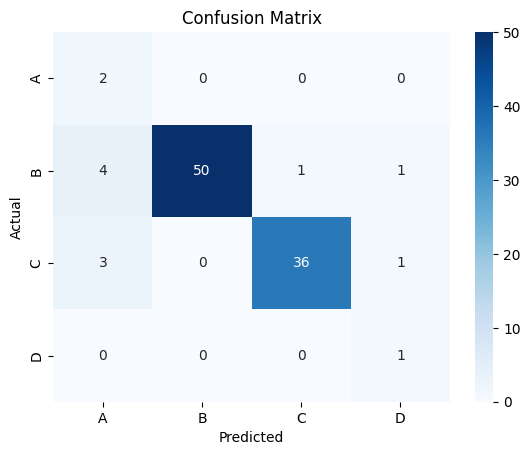

Accuracy: 0.89

Macro Metrics:
  Precision: 0.63
  Recall:    0.94
  F1-Score:  0.68

Micro Metrics:
  Precision: 0.90
  Recall:    0.89
  F1-Score:  0.89


In [24]:
# Main script --> this is for the single stage retriever
if __name__ == "__main__":
    # Path to the JSON file or directory
    path = "../mcq_notebookLM/mcqs_results-single.json"  # Replace with your path to the result json file.

    # Load and process data
    data = load_json_data(path)
    correct_answers, selected_options = extract_labels(data)

    # Define the possible answer labels
    labels = ["A", "B", "C", "D"]

    # Generate and plot the confusion matrix
    plot_confusion_matrix(correct_answers, selected_options, labels)

    # Calculate and print evaluation metrics
    calculate_metrics(correct_answers, selected_options, labels)

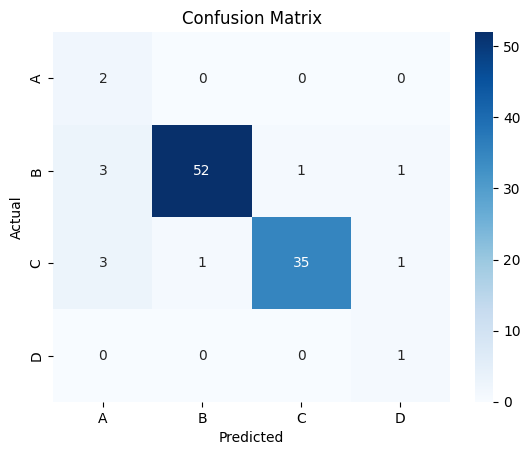

Accuracy: 0.90

Macro Metrics:
  Precision: 0.63
  Recall:    0.95
  F1-Score:  0.69

Micro Metrics:
  Precision: 0.90
  Recall:    0.90
  F1-Score:  0.90


In [25]:
# Main script --> this is for the double stage retriever
if __name__ == "__main__":
    # Path to the JSON file or directory
    path = "../mcq_notebookLM/mcqs_results.json"  # Replace with your path to the result json file.

    # Load and process data
    data = load_json_data(path)
    correct_answers, selected_options = extract_labels(data)

    # Define the possible answer labels
    labels = ["A", "B", "C", "D"]

    # Generate and plot the confusion matrix
    plot_confusion_matrix(correct_answers, selected_options, labels)

    # Calculate and print evaluation metrics
    calculate_metrics(correct_answers, selected_options, labels)

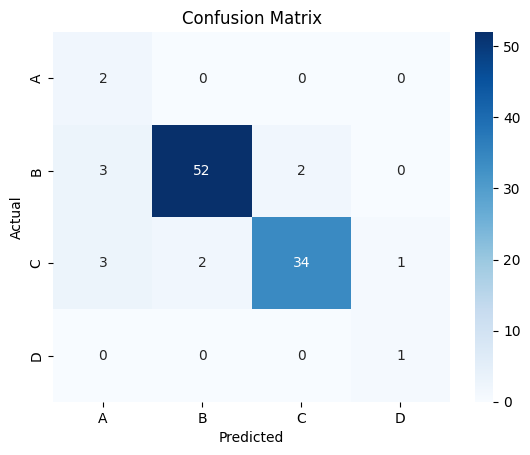

Accuracy: 0.89

Macro Metrics:
  Precision: 0.66
  Recall:    0.94
  F1-Score:  0.72

Micro Metrics:
  Precision: 0.89
  Recall:    0.89
  F1-Score:  0.89


In [26]:
# Main script --> this is for the single stage retriever
if __name__ == "__main__":
    # Path to the JSON file or directory
    path = "../mcq_notebookLM/mcqs_results-three.json"  # Replace with your path to the result json file.

    # Load and process data
    data = load_json_data(path)
    correct_answers, selected_options = extract_labels(data)

    # Define the possible answer labels
    labels = ["A", "B", "C", "D"]

    # Generate and plot the confusion matrix
    plot_confusion_matrix(correct_answers, selected_options, labels)

    # Calculate and print evaluation metrics
    calculate_metrics(correct_answers, selected_options, labels)

Similarity results saved to ../mcq_notebookLM/similarity_results.json


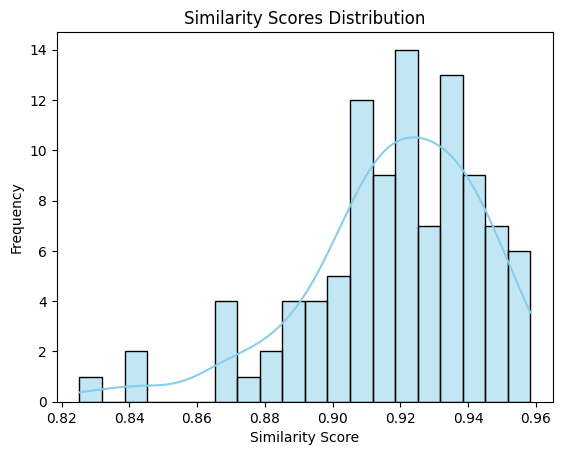

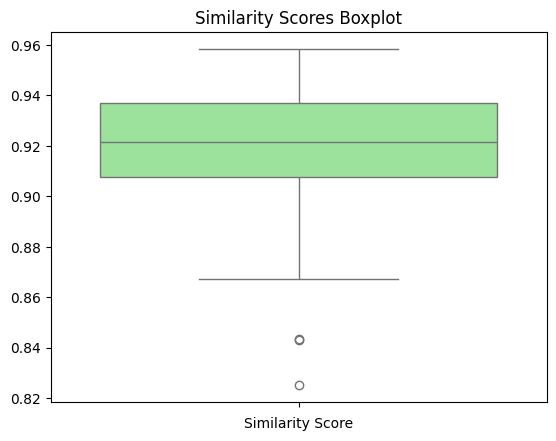

In [13]:
import json
import os
from sklearn.metrics.pairwise import cosine_similarity
from langchain.embeddings.openai import OpenAIEmbeddings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the mcqs_results.json file
def load_json_file(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data

# Calculate similarity using embeddings
def calculate_similarity(embeddings, text1, text2):
    embedding1 = embeddings.embed_query(text1)
    embedding2 = embeddings.embed_query(text2)
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    return similarity

# Process MCQ results and compute similarity
def compute_similarity_scores(mcq_results, embeddings):
    similarity_data = []
    for item in mcq_results:
        question = item["question"]
        explanation = item["explanation"]
        reasoning = item["reasoning"]
        
        similarity_score = calculate_similarity(embeddings, explanation, reasoning)
        
        similarity_data.append({
            "question": question,
            "explanation": explanation,
            "reasoning": reasoning,
            "similarity_score": similarity_score
        })
    return similarity_data

# Plot similarity scores
def plot_similarity_scores(similarity_data):
    scores = [item["similarity_score"] for item in similarity_data]
    
    # Plot distribution
    sns.histplot(scores, bins=20, kde=True, color="skyblue")
    plt.title("Similarity Scores Distribution")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot
    sns.boxplot(scores, color="lightgreen")
    plt.title("Similarity Scores Boxplot")
    plt.xlabel("Similarity Score")
    plt.show()

# Main script
if __name__ == "__main__":
    # Path to JSON file
    mcq_results_path = "../mcq_notebookLM/mcqs_results-single.json"  # Replace with your actual path
    
    # Load MCQ results
    mcq_results = load_json_file(mcq_results_path)
    
    # Initialize embeddings
    embeddings = OpenAIEmbeddings()

    # Compute similarity scores
    similarity_data = compute_similarity_scores(mcq_results, embeddings)
    
    # Save results to JSON file
    output_path = "../mcq_notebookLM/similarity_results.json"
    with open(output_path, "w") as f:
        json.dump(similarity_data, f, indent=4)
    print(f"Similarity results saved to {output_path}")

    # Visualize similarity scores
    plot_similarity_scores(similarity_data)


Similarity results saved to ../mcq_notebookLM/similarity_results-two.json


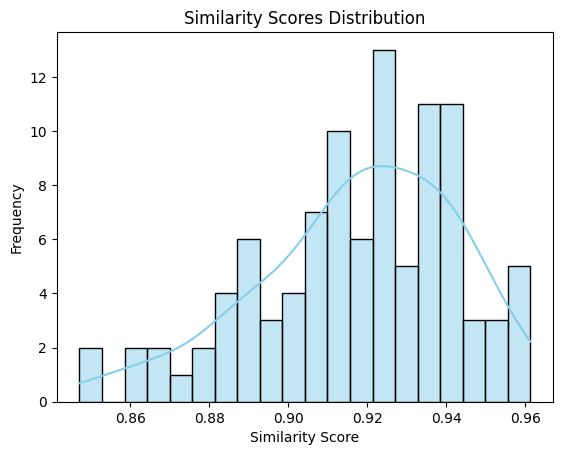

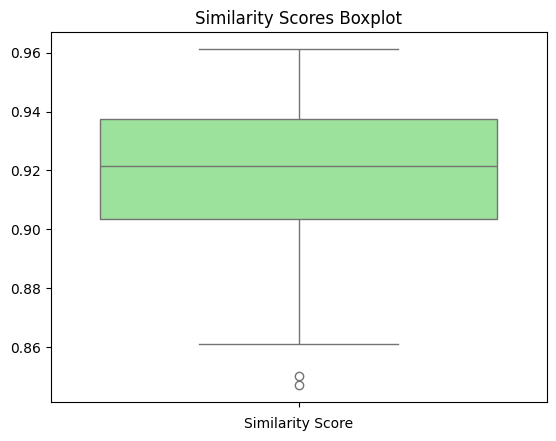

In [14]:

# Load the mcqs_results.json file
def load_json_file(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data

# Calculate similarity using embeddings
def calculate_similarity(embeddings, text1, text2):
    embedding1 = embeddings.embed_query(text1)
    embedding2 = embeddings.embed_query(text2)
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    return similarity

# Process MCQ results and compute similarity
def compute_similarity_scores(mcq_results, embeddings):
    similarity_data = []
    for item in mcq_results:
        question = item["question"]
        explanation = item["explanation"]
        reasoning = item["reasoning"]
        
        similarity_score = calculate_similarity(embeddings, explanation, reasoning)
        
        similarity_data.append({
            "question": question,
            "explanation": explanation,
            "reasoning": reasoning,
            "similarity_score": similarity_score
        })
    return similarity_data

# Plot similarity scores
def plot_similarity_scores(similarity_data):
    scores = [item["similarity_score"] for item in similarity_data]
    
    # Plot distribution
    sns.histplot(scores, bins=20, kde=True, color="skyblue")
    plt.title("Similarity Scores Distribution")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot
    sns.boxplot(scores, color="lightgreen")
    plt.title("Similarity Scores Boxplot")
    plt.xlabel("Similarity Score")
    plt.show()

# Main script
if __name__ == "__main__":
    # Path to JSON file
    mcq_results_path = "../mcq_notebookLM/mcqs_results.json"  # Replace with your actual path
    
    # Load MCQ results
    mcq_results = load_json_file(mcq_results_path)
    
    # Initialize embeddings
    embeddings = OpenAIEmbeddings()

    # Compute similarity scores
    similarity_data = compute_similarity_scores(mcq_results, embeddings)
    
    # Save results to JSON file
    output_path = "../mcq_notebookLM/similarity_results-two.json"
    with open(output_path, "w") as f:
        json.dump(similarity_data, f, indent=4)
    print(f"Similarity results saved to {output_path}")

    # Visualize similarity scores
    plot_similarity_scores(similarity_data)


Similarity results saved to ../mcq_notebookLM/similarity_results-three.json


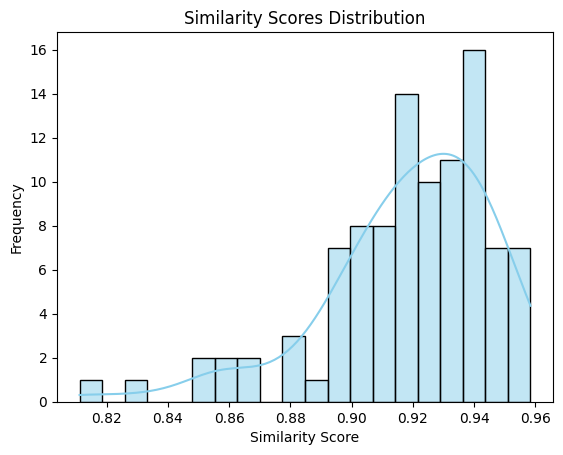

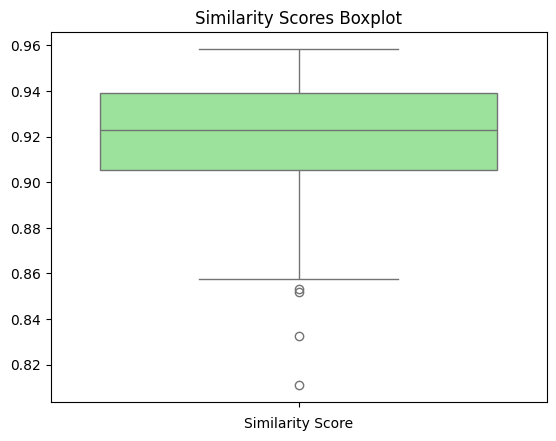

In [15]:

# Load the mcqs_results.json file
def load_json_file(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data

# Calculate similarity using embeddings
def calculate_similarity(embeddings, text1, text2):
    embedding1 = embeddings.embed_query(text1)
    embedding2 = embeddings.embed_query(text2)
    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    return similarity

# Process MCQ results and compute similarity
def compute_similarity_scores(mcq_results, embeddings):
    similarity_data = []
    for item in mcq_results:
        question = item["question"]
        explanation = item["explanation"]
        reasoning = item["reasoning"]
        
        similarity_score = calculate_similarity(embeddings, explanation, reasoning)
        
        similarity_data.append({
            "question": question,
            "explanation": explanation,
            "reasoning": reasoning,
            "similarity_score": similarity_score
        })
    return similarity_data

# Plot similarity scores
def plot_similarity_scores(similarity_data):
    scores = [item["similarity_score"] for item in similarity_data]
    
    # Plot distribution
    sns.histplot(scores, bins=20, kde=True, color="skyblue")
    plt.title("Similarity Scores Distribution")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot
    sns.boxplot(scores, color="lightgreen")
    plt.title("Similarity Scores Boxplot")
    plt.xlabel("Similarity Score")
    plt.show()

# Main script
if __name__ == "__main__":
    # Path to JSON file
    mcq_results_path = "../mcq_notebookLM/mcqs_results-three.json"  # Replace with your actual path
    
    # Load MCQ results
    mcq_results = load_json_file(mcq_results_path)
    
    # Initialize embeddings
    embeddings = OpenAIEmbeddings()

    # Compute similarity scores
    similarity_data = compute_similarity_scores(mcq_results, embeddings)
    
    # Save results to JSON file
    output_path = "../mcq_notebookLM/similarity_results-three.json"
    with open(output_path, "w") as f:
        json.dump(similarity_data, f, indent=4)
    print(f"Similarity results saved to {output_path}")

    # Visualize similarity scores
    plot_similarity_scores(similarity_data)


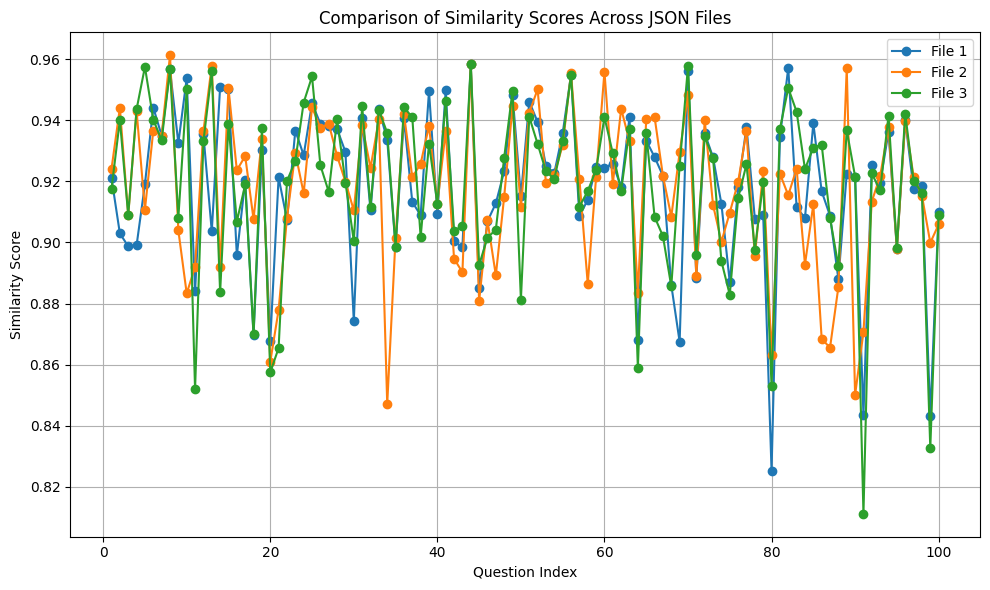

In [16]:
import json
import matplotlib.pyplot as plt

# Function to load JSON files
def load_json_file(path):
    with open(path, "r") as f:
        return json.load(f)

# Function to extract similarity scores
def extract_similarity_scores(data):
    return [item["similarity_score"] for item in data]

# Load data from all three JSON files
file_paths = [
    "../mcq_notebookLM/similarity_results.json",
    "../mcq_notebookLM/similarity_results-two.json",
    "../mcq_notebookLM/similarity_results-three.json"
]

labels = ["File 1", "File 2", "File 3"]  # Labels for the three files
all_scores = []

for path in file_paths:
    data = load_json_file(path)
    scores = extract_similarity_scores(data)
    all_scores.append(scores)

# Ensure all files have the same number of questions
min_length = min(len(scores) for scores in all_scores)
all_scores = [scores[:min_length] for scores in all_scores]  # Truncate to the minimum length

# Generate X-axis values (question indices)
x_values = range(1, min_length + 1)

# Plot line graph
plt.figure(figsize=(10, 6))

for scores, label in zip(all_scores, labels):
    plt.plot(x_values, scores, label=label, marker='o')  # Add markers for clarity

# Add labels, legend, and title
plt.xlabel("Question Index")
plt.ylabel("Similarity Score")
plt.title("Comparison of Similarity Scores Across JSON Files")
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
